## **Logistic Regression**

We will be using titanic passenger dataset from kaggle as an example of logistic regression. (https://www.kaggle.com/competitions/titanic/data)

The model will predict a whether passenger survived or not, classification- 'survived' or 'deceased' based on the passenger details provided in the dataset.
First , we will import important libraries and read the csv input file

In [58]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/My\ Drive
%cd 'Colab Notebooks'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive
/content/drive/My Drive/Colab Notebooks


In [6]:
train = pd.read_csv('titanic_train.csv')

In [7]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

**Exploratory Data Analysis**

We will do some exploratory data analysis to understand the input features.

Let's identify if there is some missing data in the dataset

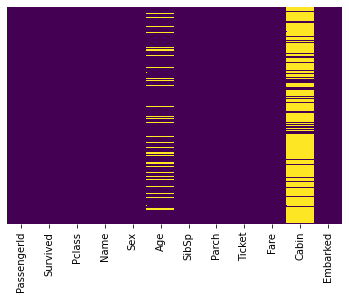

In [9]:
sns.heatmap(train.isnull(), yticklabels=False, cbar = False, cmap = 'viridis' )

We can see that there are missing values in 'Age' column and 'Cabin' column.  A lot of data is missing in 'Cabin' column where as comparatively small amount of data is missing in 'Age' column.

Let's visualize further

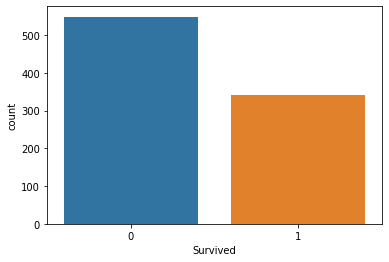

In [10]:
sns.countplot(x = 'Survived', data=train)

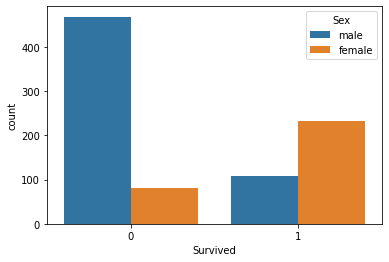

In [11]:
sns.countplot(x = 'Survived', hue ='Sex', data=train)

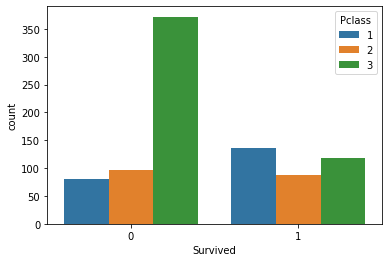

In [12]:
sns.countplot(x='Survived',hue='Pclass',data=train)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


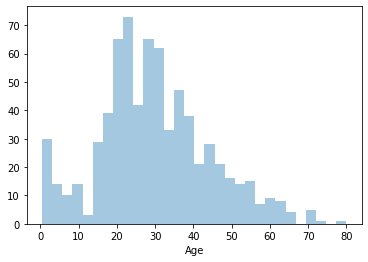

In [13]:
sns.distplot(train['Age'].dropna(),kde=False, bins = 30)

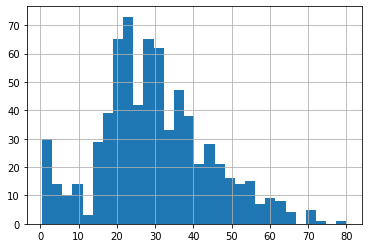

In [14]:
train['Age'].hist(bins=30)

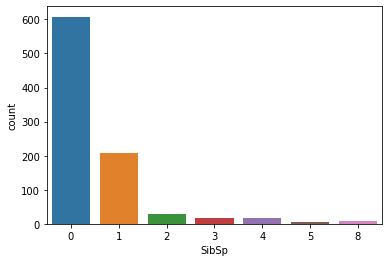

In [15]:
sns.countplot(x='SibSp',data=train)

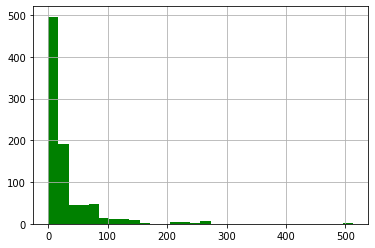

In [16]:
train['Fare'].hist(color='green',bins=30)

**Data** **Cleaning**

We will fill the missing data in 'Age' column. There are multiple ways to handle missing data. One way is to fill the mean age of all the passengers in pace of null (imputing).
Let's find the average age of passengers

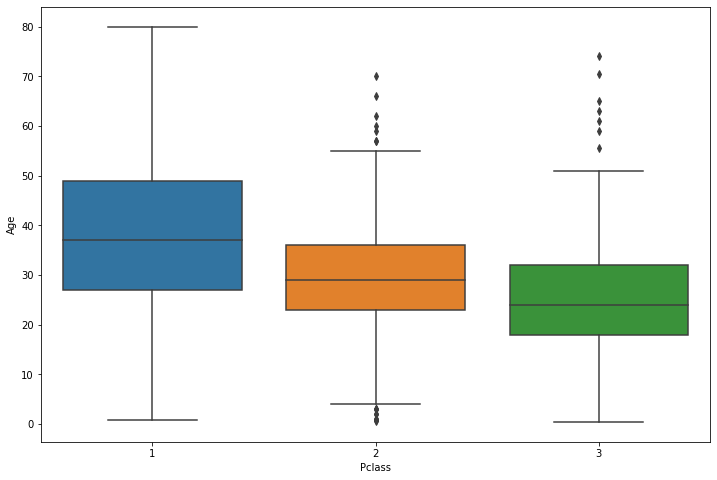

In [17]:
plt.figure(figsize=(12,8))
sns.boxplot(x='Pclass', y='Age', data=train)

We can see that apssengers in 1st class who are weatheir are older and passengers in other two classes are comparatively younger. We will use average age values of passengers from each Pclass to impute the Age .

In [18]:
def impute_age(col):
  Age = col[0]
  Pclass = col[1]

  if pd.isnull(Age):
    if Pclass == 1:
      return 37
    elif Pclass == 2:
      return 29
    else:
      return 24
  else:
    return Age

We wil use the above defined function.

In [19]:
train['Age'] = train[['Age','Pclass']].apply(impute_age, axis=1)

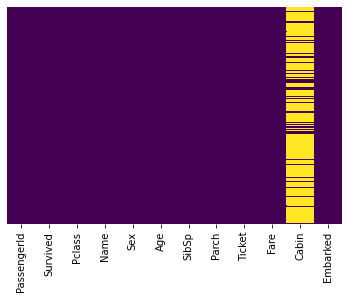

In [20]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Now there are no null values in 'Age' column. 80% of the values in cabin class are null so it will be better to drop this column.

In [21]:
train.drop(columns='Cabin',inplace =True)

In [22]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [23]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

There are some categorical features that needs to be converted to discrete using pandas dummy library.

In [24]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [26]:
sex = pd.get_dummies(train['Sex'], drop_first=True)
embark = pd.get_dummies(train['Embarked'],drop_first=True)

'Name' and 'Ticket' column won't provide any important information for model building so we will drop them along with 'Sex' and 'Embarked' columns

In [29]:
train.drop(['Sex','Embarked','Name', 'Ticket'],axis=1,inplace=True)

In [30]:
train = pd.concat([train,sex,embark],axis=1)

In [31]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


**Logistic regression model**

Train Test Split

In [33]:
from sklearn.model_selection import train_test_split

In [42]:
X_train, X_test, y_train, y_test = train_test_split(train.drop('Survived', axis=1), train['Survived'], test_size =0.2, random_state=42)

In [43]:
print(X_train.shape)
print(X_test.shape)

(712, 9)
(179, 9)


In [44]:
from sklearn.linear_model import LogisticRegression

In [45]:
model = LogisticRegression()
model.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [46]:
pred = model.predict(X_test)

Model Performance Evaluation

In [56]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [54]:
print(confusion_matrix(y_test,pred))

[[88 17]
 [23 51]]


Above confusion matrix shows the count of TP,FP,TN,FN
88 positive labels were predicted correctly, 17 positive labels were mislabelled as negative.
51 negative labels were predicted correctly, 23 negative labels were mislabelled as positive.
Always look at the digoal numbers to see the correctly predicted labels. Total 88+51 = 139. out of 179 labels were predicted correctly.

In [57]:
print("Model accuracy is ",accuracy_score(y_test,pred))

Model accuracy is  0.776536312849162


In [ ]:
Accuracy looks good . We will now print the precision, recall and F1 score of the model.

In [50]:
print("Classification report \n", classification_report(y_test,pred))

Classification report 
               precision    recall  f1-score   support

           0       0.79      0.84      0.81       105
           1       0.75      0.69      0.72        74

    accuracy                           0.78       179
   macro avg       0.77      0.76      0.77       179
weighted avg       0.78      0.78      0.77       179



In [ ]:
Great! We have implemented the model. The performance can be improved further with more data analysis and exploration.